In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class Agentstate(TypedDict):
  num1:int
  operation:str
  num2:int
  num3:int
  operation_1:str
  num4:int
  final_number1:int
  final_number2:int


In [3]:
def add_node(state:Agentstate)->Agentstate:
  state['final_number1']=state['num1']+state['num2']
  return state

def sub_node(state:Agentstate)->Agentstate:
  state['final_number1']=state['num1']-state['num2']
  return state

def decision_making_node_1(state:Agentstate)->Agentstate:
  if state['operation']=='+':
    return 'addition'
  elif state['operation']=='-':
    return 'subtraction'

def add_node_2(state:Agentstate)->Agentstate:
  state['final_number2']=state['num3'] + state['num4']
  return state

def sub_node_2(state:Agentstate)->Agentstate:
  state['final_number2']=state['num3']-state['num4']
  return state

def decision_making_node_2(state:Agentstate)->Agentstate:
  if state['operation_1']=='+':
    return "addition_2"
  elif state['operation_1']=='-':
    return "subtraction_2"

In [4]:
graph=StateGraph(Agentstate)



graph.add_node("adder",add_node)
graph.add_node("subtractor",sub_node)
graph.add_node("router",lambda state:state)

graph.add_node("add_node_2",add_node_2)
graph.add_node("sub_node_2",sub_node_2)
graph.add_node("router_1",lambda state:state)

graph.add_edge(START,"router")


graph.add_conditional_edges(
    "router",
    decision_making_node_1,
    {
        "addition":"adder",
        "subtraction":"subtractor"
    }
)



graph.add_edge("adder","router_1")
graph.add_edge("subtractor","router_1")

graph.add_conditional_edges(
    "router_1",
    decision_making_node_2,
    {
        "addition_2":"add_node_2",
        "subtraction_2":"sub_node_2"
    }
)

graph.add_edge('add_node_2',END)
graph.add_edge('sub_node_2',END)

In [5]:
app=graph.compile()

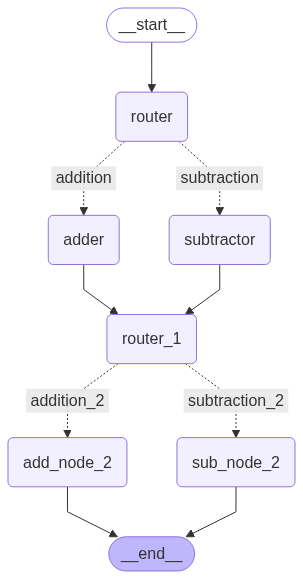

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state = Agentstate(num1 = 10, operation="-", num2 = 5, num3 = 7, num4=2, operation_1="+", finalNumber= 0, finalNumber2 = 0)

In [8]:
print(app.invoke(initial_state))

{'num1': 10, 'operation': '-', 'num2': 5, 'num3': 7, 'operation_1': '+', 'num4': 2, 'final_number1': 5, 'final_number2': 9}
